# Zomato Data Analysis Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("Zomato data .csv")


In [11]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Convert the data type of column -rate

In [12]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)
df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Type of resturant

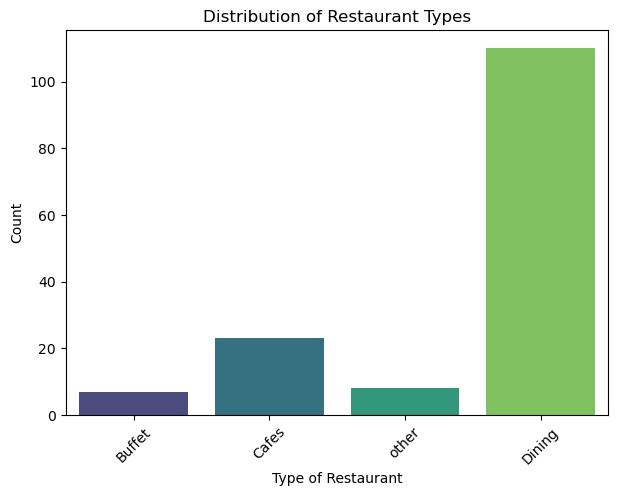

In [19]:
plt.figure(figsize=(7, 5))  
sns.countplot(x="listed_in(type)", data=df, hue="listed_in(type)", palette="viridis", legend=False)  
plt.xlabel("Type of Restaurant")  
plt.ylabel("Count")  
plt.xticks(rotation=45)  
plt.title("Distribution of Restaurant Types")
plt.show()

# conclusion: majority of the resturants falls in dining category


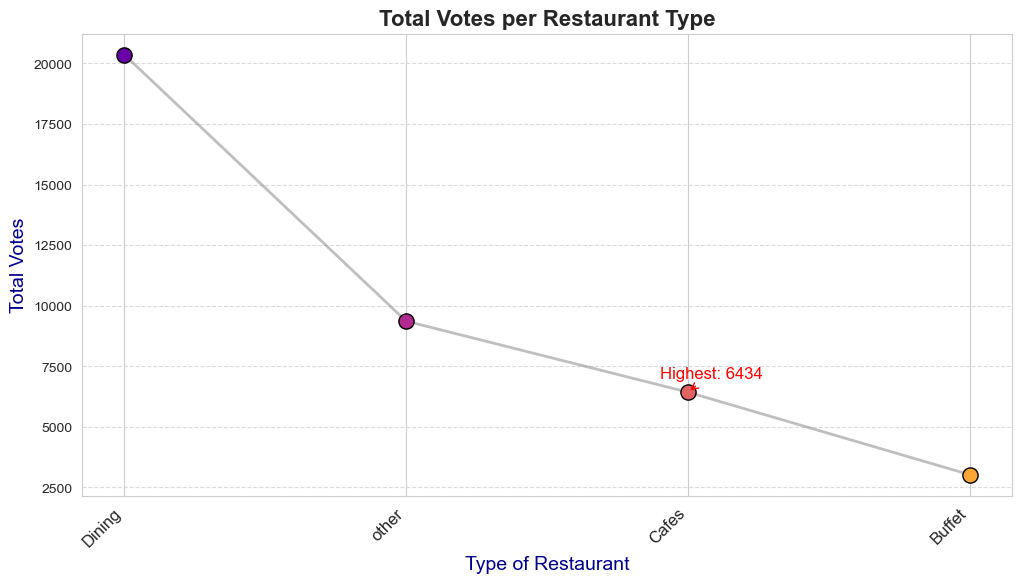

In [31]:
sns.set_style("whitegrid")
grouped_data = df.groupby('listed_in(type)')['votes'].sum().reset_index()
grouped_data = grouped_data.sort_values(by='votes', ascending=False)
colors = sns.color_palette("plasma", len(grouped_data)) 

plt.figure(figsize=(12, 6))
for i, (restaurant, votes) in enumerate(zip(grouped_data['listed_in(type)'], grouped_data['votes'])):
    plt.scatter(restaurant, votes, color=colors[i], s=120, edgecolor="black", zorder=3)

plt.plot(grouped_data['listed_in(type)'], grouped_data['votes'], 
         linestyle="-", linewidth=2, color="gray", alpha=0.5, zorder=2)

plt.xlabel("Type of Restaurant", fontsize=14, color="darkblue")
plt.ylabel("Total Votes", fontsize=14, color="darkblue")
plt.title("Total Votes per Restaurant Type", fontsize=16, fontweight="bold")
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

max_votes_idx = grouped_data['votes'].idxmax()
plt.annotate(f"Highest: {grouped_data.iloc[max_votes_idx]['votes']}", 
             (grouped_data.iloc[max_votes_idx]['listed_in(type)'], grouped_data.iloc[max_votes_idx]['votes']),
             xytext=(-20, 10), textcoords="offset points", 
             arrowprops=dict(arrowstyle="->", color="red"), fontsize=12, color="red")

plt.show()



# conclusion : dining restuarants has received maximum votes

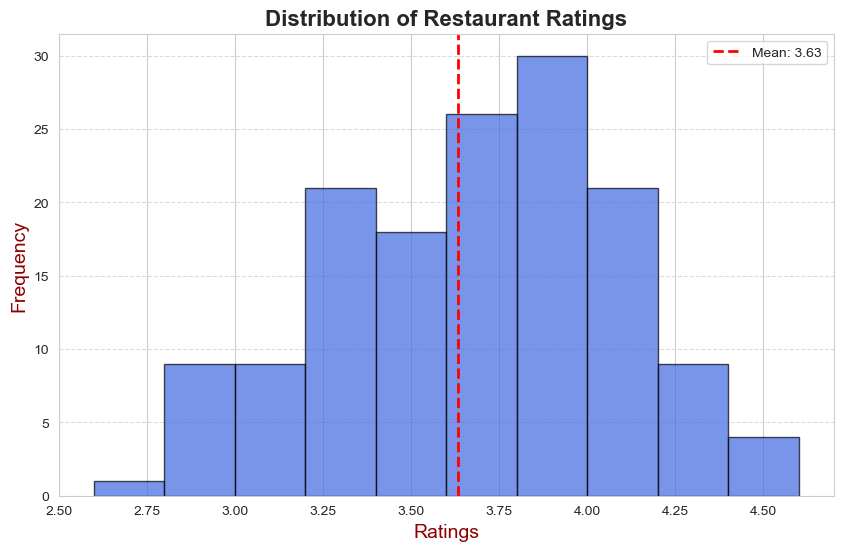

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6)) 
plt.hist(df['rate'], bins=10, color="royalblue", edgecolor="black", alpha=0.7)

plt.xlabel("Ratings", fontsize=14, color="darkred")
plt.ylabel("Frequency", fontsize=14, color="darkred")
plt.title("Distribution of Restaurant Ratings", fontsize=16, fontweight="bold")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Dashed grid only on y-axis
mean_rating = df['rate'].mean()
plt.axvline(mean_rating, color="red", linestyle="dashed", linewidth=2, label=f"Mean: {mean_rating:.2f}")
plt.legend()

plt.show()


# conclusion : the majority resturats received ratings from 3.75 to 4

# Average order spending by couples

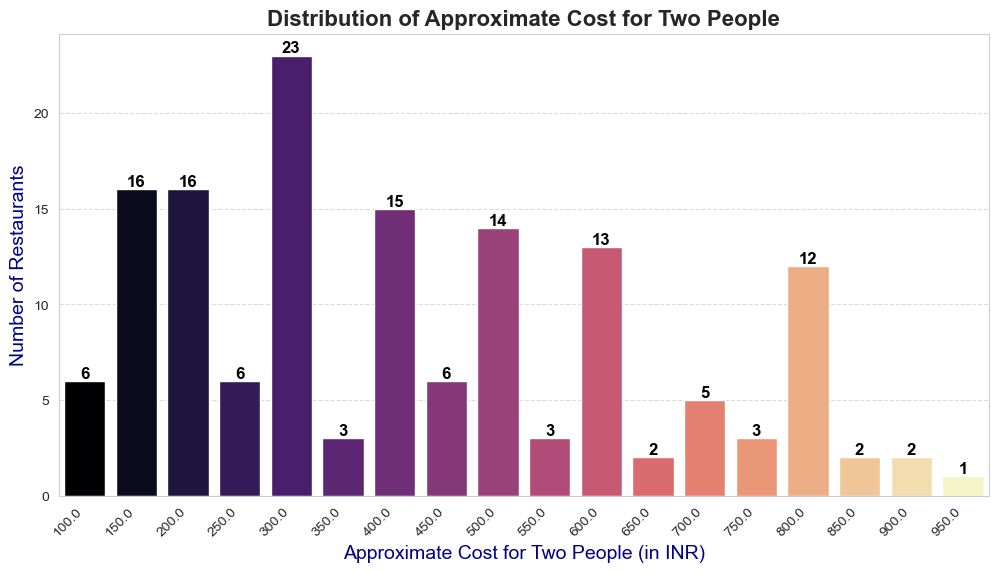

In [30]:
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '').astype(float)
sorted_costs = df['approx_cost(for two people)'].value_counts().sort_index().index

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(
    x=df['approx_cost(for two people)'], 
    order=sorted_costs,  
    hue=df['approx_cost(for two people)'], 
    palette="magma",  
    legend=False  
)
plt.xlabel("Approximate Cost for Two People (in INR)", fontsize=14, color="darkblue")
plt.ylabel("Number of Restaurants", fontsize=14, color="darkblue")
plt.title("Distribution of Approximate Cost for Two People", fontsize=16, fontweight="bold")

plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

plt.show()


In [32]:
# conclusion : the majority of couples prefer resturants with an appropriate cost of 300 rupees

# the mode which received maximum ratings

<Axes: xlabel='online_order', ylabel='rate'>

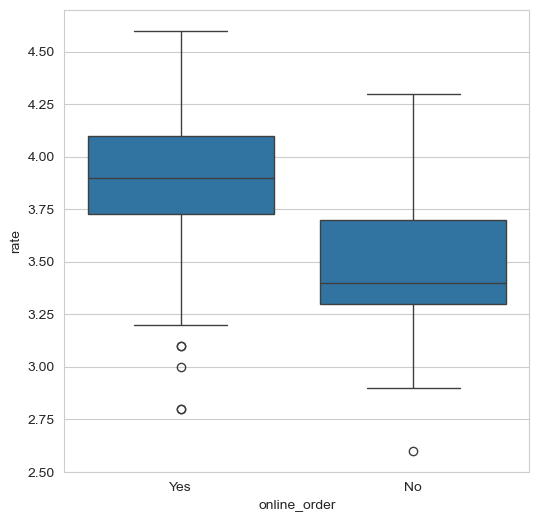

In [33]:
plt.figure(figsize =(6,6))
sns.boxplot( x= 'online_order', y= 'rate', data=df)

# conclusion : offline order received lower rating in comparision to online order

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


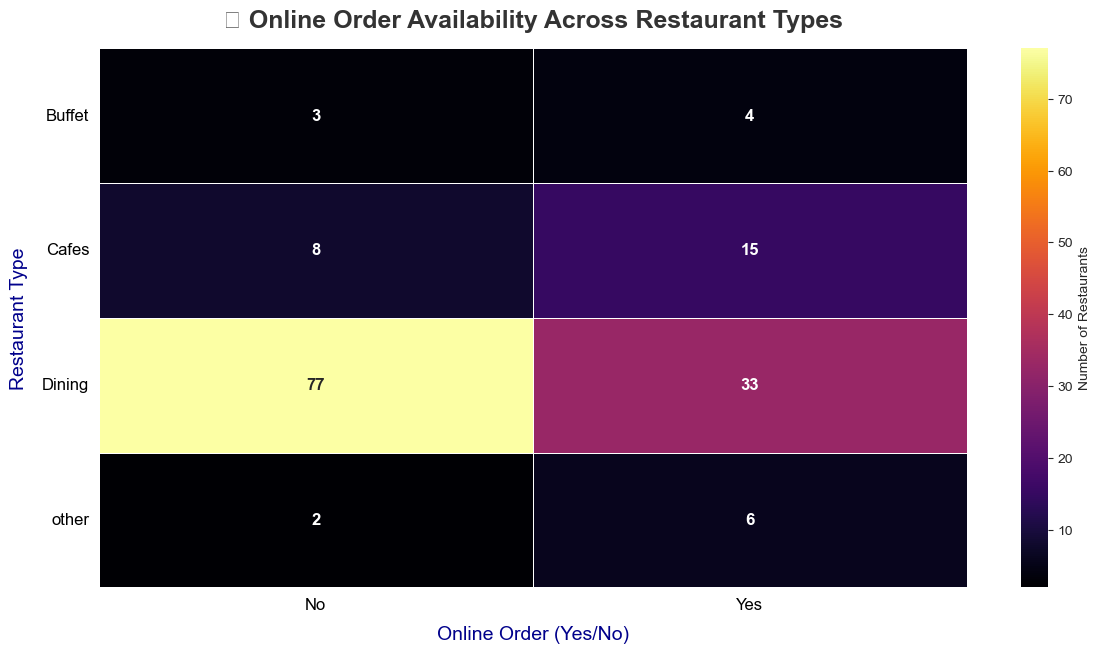

In [36]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_table, 
            annot=True,          
            cmap="inferno",      
            fmt='d',             
            linewidths=0.7,     
            linecolor="white",   
            cbar=True,           
            cbar_kws={'label': 'Number of Restaurants'}, 
            annot_kws={"fontsize":12, "fontweight":"bold"} 
           )

plt.title("📊 Online Order Availability Across Restaurant Types", fontsize=18, fontweight="bold", color="#333333", pad=15)
plt.xlabel("Online Order (Yes/No)", fontsize=14, color="darkblue", labelpad=10)
plt.ylabel("Restaurant Type", fontsize=14, color="darkblue", labelpad=10)

plt.xticks(fontsize=12, color="black", rotation=0)
plt.yticks(fontsize=12, color="black", rotation=0)

plt.show()


# conclusion: dining resturants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that client prefer to place orders in person at resturants, but prefer online ordering at cafes. 